# READ ME

In [3]:
# for a static version of this notebook please visit: https://github.com/ShourayDuggal/Financial-Engineering/blob/main/Homework.ipynb
# Please ensure that all necessary packages have been downloaded and duly installed before running this file.
## Required packages: 
            # numpy
            # scipy
            # pandas
            # matplotlib

# Please ensure that all necessary data files (excel) are in the same folder as the code files.

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Question 1
✅ 1) plot the value of a bull spread at time t, as well as its payoff at expiration, **using put options**

✅ 2) Plot also the value of a bear spread at time t, as well as its payoff at expiration, **using call options**

Assume the following parameters: St = 80, T = 0.5, r = 3%, σ = 20%.

In [5]:

def calculate_option_premium(strike, vol, time_2_maturity, riskfree, current_price, call = True):

    """ 
    Parameters: call = Boolean, if true returns the price of call option, if false returns the price of a put option; Default = True
   
                       time_2_maturity in years, riskfee in years, strike = k, col = sigma (Anual),
                           
                       current_price = price of underlying asset as observed in the market, """
    d1 = (np.log(current_price/strike) + time_2_maturity*(riskfree + (vol**2)/2))
    d1 = d1 / (vol * (time_2_maturity)**0.5)
    d2 = d1 - vol * (time_2_maturity**0.5)
    discount_factor = np.exp(-riskfree*time_2_maturity)
    c_t  = current_price* norm.cdf(d1) - (strike*discount_factor* norm.cdf(d2))
    if call:
        return round(c_t,2)
    # p_t = (strike * interest *norm.cdf(-d2)) - (current_price* ( norm.cdf(-d1))) ## regular (BS)

    p_t = c_t + strike*discount_factor - current_price ## put call parity
    return round(p_t,2)

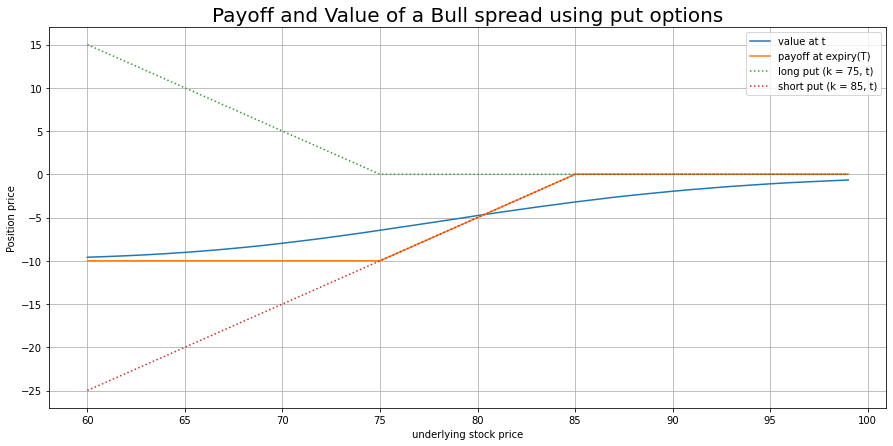

In [25]:
St = 80
T = 0.5*1
r = 3 * 0.01
sigma = 20 * 0.01

## k1 => strike of long put
## k2 => strike of short put
## K2 > k1
## net position = k1 - k2
k1 = St - 5
k2 = St + 5
net_position = []
long_position = []
short_position = []

long_position_expiry = []
short_position_expiry= []

underlying_price = []
net_position_expiry = []
# time_value_t = []
for underlying in range(60,100):
    underlying_price.append(underlying) 
    long_put =  calculate_option_premium(current_price= underlying, time_2_maturity= T, riskfree = r, vol = sigma, strike=k1 ,call = False)
    short_put = calculate_option_premium(current_price= underlying, time_2_maturity= T, riskfree = r, vol = sigma, strike=k2, call = False)
    net_position.append(long_put - short_put)

    ## caluclating net profit loss including payment at time made at t = 0 with st = 80
    
    ## calculating values at expiry
    long_put_expiry =  calculate_option_premium(current_price= underlying, time_2_maturity= 0.0000000000000001, riskfree = r, vol = sigma, strike=k1,call = False )
    short_put_expiry = calculate_option_premium(current_price= underlying, time_2_maturity= 0.0000000000000001, riskfree = r, vol = sigma, strike=k2, call = False)
    net_position_expiry.append(long_put_expiry - short_put_expiry)
    long_position_expiry.append(long_put_expiry)
    short_position_expiry.append(-1*short_put_expiry)


## creating plot

plt.figure(figsize=(15,7))



plt.plot(underlying_price, net_position, label = 'value at t')
plt.plot(underlying_price, net_position_expiry, label = 'payoff at expiry(T)')

plt.plot(underlying_price, long_position_expiry,linestyle = 'dotted', label = 'long put (k = {}, t)'.format(k1))
plt.plot(underlying_price, short_position_expiry,linestyle = 'dotted',  label = 'short put (k = {}, t)'.format(k2))

plt.grid()

plt.title("Payoff and Value of a Bull spread using put options", size = 20)
plt.xlabel('underlying stock price')
plt.ylabel('Position price')
# plt.grid()
plt.legend()
plt.show()


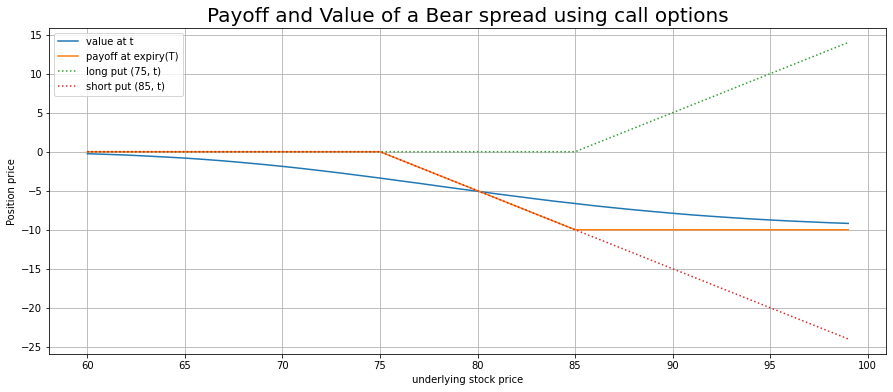

In [24]:
# Bear spread using call option

St = 80
T = 0.5*1
r = 3 * 0.01
sigma = 20 * 0.01

## k1 => strike of short call
## k2 => strike of long call
## K2 > k1
## net position = k2 - k1
k1 = St - 5
k2 = St + 5
underlying_price = []

## positions at time t
net_position = []
long_position = []
short_position = []

## positions at time expiry
long_position_expiry = []
short_position_expiry= []
net_position_expiry = []

for underlying in range(60,100):
    underlying_price.append(underlying) 
    long_call =  calculate_option_premium(current_price= underlying, time_2_maturity= T, riskfree = r, vol = sigma, strike=k2)
    short_call = calculate_option_premium(current_price= underlying, time_2_maturity= T, riskfree = r, vol = sigma, strike=k1)
   
    net_position.append(long_call - short_call)

    ## caluclating net profit loss including payment at time made at t = 0 with st = 80
    
    ## calculating values at expiry
    long_call_expiry =  calculate_option_premium(current_price= underlying, time_2_maturity= 0.0000000000000001, riskfree = r, vol = sigma, strike=k2 )
    short_call_expiry = calculate_option_premium(current_price= underlying, time_2_maturity= 0.0000000000000001, riskfree = r, vol = sigma, strike=k1)
    net_position_expiry.append(long_call_expiry - short_call_expiry)
    long_position_expiry.append(long_call_expiry)
    short_position_expiry.append(-1*short_call_expiry)

## calculating cost of entering the trade at underlying = 80, T = 6 months, r = 3%, vol = 30%
long_call_80_t =  calculate_option_premium(current_price= 80, time_2_maturity= T, riskfree = r, vol = sigma, strike = k2)
short_call_80_t = calculate_option_premium(current_price= 80, time_2_maturity= T, riskfree = r, vol = sigma, strike =k1)


plt.figure(figsize=(15,6))
# sns.set()


plt.plot(underlying_price, net_position, label = 'value at t')
plt.plot(underlying_price, net_position_expiry, label = 'payoff at expiry(T)')

plt.plot(underlying_price, long_position_expiry,linestyle = 'dotted', label = 'long put ({}, t)'.format(k1))
plt.plot(underlying_price, short_position_expiry,linestyle = 'dotted',  label = 'short put ({}, t)'.format(k2))


plt.title("Payoff and Value of a Bear spread using call options", size = 20)
plt.xlabel('underlying stock price')
plt.ylabel('Position price')
plt.grid()
plt.legend()
plt.show()


# Question 2: Fixed Income Engineering 

In [8]:
## calculate bond prices!!
# NOTE: USE FRAs from start UNTIL THE SAME COLUMN, I.E, for eg. TO CALCULATE B(0,6)=> USE UNTIL F(3,6): 
# F(0,3) => DISCOUNT RATE BETWEEN 0 AND 3, F(3 X 6) OR { AS IN NOTES :F(0,3)} = DISCOUNT RATE FOR TIME PERIOD BETWEEN 3 AND 6

def discountBondFromFRA(fra_df, delta, notional = 100, bid = True):
    """ fra_df = pandas dataframe, must have columns: time, bid (ask) , FRA_payment_exchange_time,
        fra_df:  MUST BE SORTED by time
        delta = (ti - t(i-1))/12
        bid = boolean, if true uses FRA bid prices to calculate yield and price of bonds else calculates using the ask prices; default = True
        RETURNS data_frame with additional columns of bond prices and yields
        """
    ## setting price column value and changing it based on boolean input
    column = 'ask'
    if(bid):
        column = 'bid'
    ## initiating lists to store calculated variables
    bondPrices = []
    discountRates_ = [] ## just in case we need to analyse what went wrong, loging calculated values
    bondYields_ = []
    for i in range(0,fra_df.shape[0]):
        discountRate = np.prod(1 + delta * fra_df.loc[:i,column].values)
        discountRates_.append(discountRate)
        bondPrice = notional/discountRate
        bondPrices.append(round(bondPrice, 2))
        ## calculating yield of bond
        T = fra_df.loc[i,'FRA_payment_exchange_time'] / 12 ## since BOND to = 0 always for our case
        ## T = time to maturity in yeras, exchange_time is in months therefore we divide by 12
        bondYield = np.power(notional/bondPrice,1/T) - 1
        bondYields_.append(round(bondYield, 4)) 
    fra_df['bondPrice_' + column] = bondPrices
    fra_df['bondYield_' + column] = bondYields_
    return fra_df

In [9]:
def forwaardSwapCurve(fra_bond_df):
    ## swap curve calculation using discount bond prices and FRA's
    ## Implementing the weighted sum of FRA's Interpretation 


    """ fra_bond_df = pandas dataframe which must have 2 columns 'bid', 'bondPrice_bid'
        bid = the bid prices for FRA's
        bondPrice_bid = discount bond bid prices
        RETURNS: dataframe with column 'forward_swap_rates'
        """
    forward_swap_rates = []
    for j in range(0,len(fra_bond_df)):
        ## estimating the denominator of a swap with n = 'j' months
        denominator = np.sum(fra_bond_df.loc[:j , 'bondPrice_bid'].values)
        ## using the denominator to calculate individual FRA weights
        weights = (1/denominator) * fra_bond_df.loc[:j , 'bondPrice_bid'].values
        ## calculating the weighted sum
        forward_swap_rate = np.sum(weights * fra_bond_df.loc[:j , 'bid'].values) ## weights * FRA bid prices
        ## rounding the rate to 4 decimal places and storing value
        forward_swap_rates.append(round(forward_swap_rate,4))
    fra_bond_df['forward_swap_rates'] = forward_swap_rates
    return fra_bond_df


In [10]:
## Loading the dat afromthe excel file
fra_data = pd.read_excel('ECOM179 FRAdata.xlsx', header=1)
## Removing additional read columns and converting it to prefered form with prefered variable names
fra_data.drop(columns= 'Unnamed: 0', inplace=True)
fra_data.columns = ['Time', 'bid']
fra_data

,Time,bid
0,0 x 3,0.0400
1,3 x 6,0.0450
2,6 x 9,0.0470
3,9 x 12,0.0500
4,12 x 15,0.0550
5,15 x 18,0.0610
6,18 x 21,0.0630
7,21 x 24,0.0636
8,24 x 27,0.0640


In [11]:
fra_data['FRA_floating_set_time'] = fra_data.Time.apply(lambda x : int(x.split(' x ' )[0])) 

fra_data['FRA_payment_exchange_time'] = fra_data.Time.apply(lambda x : int(x.split(' x ' )[1]))

# calculating delta

delta = (fra_data.FRA_payment_exchange_time[0]- fra_data.FRA_floating_set_time[0])/12
print ('calculated delta = {}'.format(delta))
fra_data

calculated delta = 0.25


,Time,bid,FRA_floating_set_time,FRA_payment_exchange_time
0,0 x 3,0.0400,0,3
1,3 x 6,0.0450,3,6
2,6 x 9,0.0470,6,9
3,9 x 12,0.0500,9,12
4,12 x 15,0.0550,12,15
5,15 x 18,0.0610,15,18
6,18 x 21,0.0630,18,21
7,21 x 24,0.0636,21,24
8,24 x 27,0.0640,24,27


In [12]:
fra_bond_df_assignment = discountBondFromFRA(fra_df=fra_data, delta= 0.25, notional=100, bid = True)
fra_bond_df_assignment

,Time,bid,FRA_floating_set_time,FRA_payment_exchange_time,bondPrice_bid,bondYield_bid
0,0 x 3,0.0400,0,3,99.01,0.0406
1,3 x 6,0.0450,3,6,97.91,0.0432
2,6 x 9,0.0470,6,9,96.77,0.0447
3,9 x 12,0.0500,9,12,95.58,0.0463
4,12 x 15,0.0550,12,15,94.28,0.0482
5,15 x 18,0.0610,15,18,92.86,0.0506
6,18 x 21,0.0630,18,21,91.42,0.0526
7,21 x 24,0.0636,21,24,89.99,0.0541
8,24 x 27,0.0640,24,27,88.58,0.0554


In [13]:
fra_bond_swap_df_assignment = forwaardSwapCurve(fra_bond_df= fra_bond_df_assignment)
fra_bond_swap_df_assignment

,Time,bid,FRA_floating_set_time,FRA_payment_exchange_time,bondPrice_bid,bondYield_bid,forward_swap_rates
0,0 x 3,0.0400,0,3,99.01,0.0406,0.0400
1,3 x 6,0.0450,3,6,97.91,0.0432,0.0425
2,6 x 9,0.0470,6,9,96.77,0.0447,0.0440
3,9 x 12,0.0500,9,12,95.58,0.0463,0.0455
4,12 x 15,0.0550,12,15,94.28,0.0482,0.0473
5,15 x 18,0.0610,15,18,92.86,0.0506,0.0495
6,18 x 21,0.0630,18,21,91.42,0.0526,0.0514
7,21 x 24,0.0636,21,24,89.99,0.0541,0.0528
8,24 x 27,0.0640,24,27,88.58,0.0554,0.0540


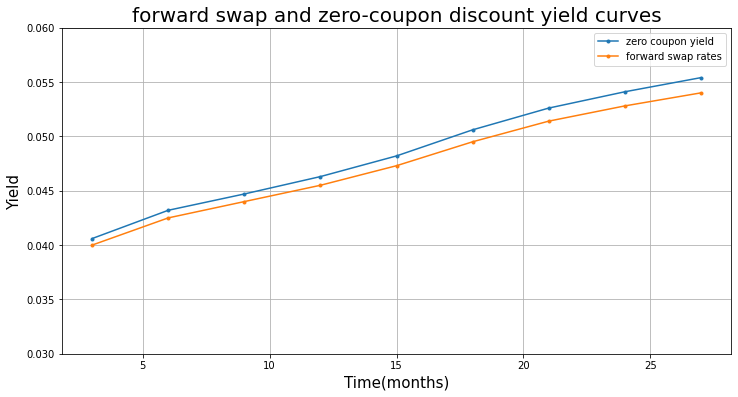

In [14]:
plt.figure(figsize = (12,6))
plt.plot(fra_bond_swap_df_assignment.FRA_payment_exchange_time, fra_bond_swap_df_assignment.bondYield_bid, marker  = '.', label = 'zero coupon yield')
plt.plot(fra_bond_swap_df_assignment.FRA_payment_exchange_time, fra_bond_swap_df_assignment.forward_swap_rates, marker  = '.', label = 'forward swap rates')
plt.legend()
plt.grid()
plt.title('forward swap and zero-coupon discount yield curves', size = 20)
plt.xlabel('Time(months)', size = 15)
plt.ylabel('Yield', size = 15)
plt.ylim(0.03,0.06)
plt.show()

# Question 3: Variance swaps (Equity)

In [15]:
## initialise the value of S,t,r,sigma
S = 50
T = 0.25
r = 0.06
sig = 0.25
mean_returns = []
## consider 20 different mean returns
price = []
for j in range(1,21):
    ## mean return of stock
    mean_returns.append(j)
    mu = 0.1*j   
    
    ## Total no of stock price path simulations for every mean return
    N = 1000
    ## list to store prices for each swap simulation 
    varswap = []
    for rep in range(0,N):
        s = [S] # starting s[0] as innitial price S
        ret = []
        ## stock price Simulation and payoff calculation 
        M = 100
        t = T/M # delta
        
        for i in range(1,M):
            # sock price follows geometric brownian motion
            # ds = r*S*dt + sig*S*dwt, dwt = noraml with mean 0 and variance t (delta)
            si = s[i-1] + r*s[i-1]*t + sig*s[i-1]*np.sqrt(t)*np.random.normal(0,1,1)[0]
            s.append(si)
            ret.append( (((si - s[i-1])/ s[i-1]) - mu*t)**2 )
        varswap.append(sum(ret)/T)
    price.append(np.mean(varswap))
    

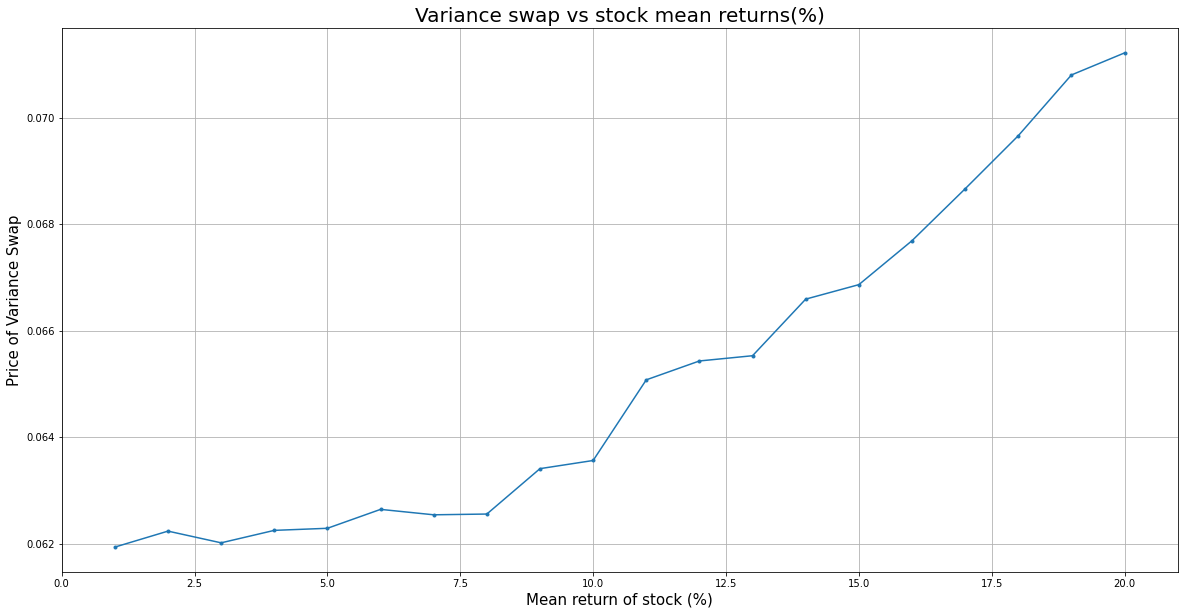

In [16]:
plt.figure(figsize = (20,10))
plt.plot(mean_returns, price, marker = '.')
plt.xlabel('Mean return of stock (%)', size = 15)
plt.ylabel('Price of Variance Swap', size = 15)
plt.title('Variance swap vs stock mean returns(%)', size = 20)
plt.xlim(0,21)
plt.grid()
plt.show()

# Question 4: Credit Default Swaps

In [26]:
def cal_CDF_spread(prob_default_anual, discount_rate, recovery_rate, notional_amount = 1, CDS = 0.0284, T = 5):
    
    """
    Returns a dictionary with a premium datafram, accurial dataframe and the net cash value at time zero 

    'premiums_df': premiums_df
    'accurial_df' : The accurial dataframe 
    'net_cashflow_t0': PV of total expected premiums + PV of total accurial paymnets - present value of expected payouts

    """
    Time  = np.array([t for t in range(1,T+1)])
    prob_survival = np.array([np.exp(-prob_default_anual *t) for t in Time])
    ## expected payment = CDS * prob_survival
    expected_payment = CDS * prob_survival
    ## discount factor = e^(-rt)
    discount_factor = np.exp(-discount_rate*Time)
    # pv_expected_payment
    present_expected_value = discount_factor*expected_payment
    premiums_df = pd.DataFrame({"Time": Time, 'prob_survival' : prob_survival, 'expected_payment': expected_payment, 'discount_factor': discount_factor, 'present_expected_value': present_expected_value})

    ## adding the present value of all the premium paymnets 
    premium_total = np.sum(present_expected_value)
    ## Accured payments and protection payouts
    Default_times = Time - 0.5
    prob_default = [1 - prob_survival[0]] ## setting up the first value
    ## calculating the next value by subtracting probability value at t-1 from t
    prob_default = np.array(prob_default + list((premiums_df.shift(1).prob_survival - premiums_df.loc[1:,].prob_survival).dropna().values))
    ## expected_accrual_paymemnt = CDs * (prob_default/2) dividing by 2 because the default can only happen in the middle of the year.
    expected_accrual_payment = CDS* prob_default/2
    discount_factor_default = np.exp(-discount_rate*Default_times)
    expected_accrual_payment_present_value = discount_factor_default*expected_accrual_payment
    total_accural = np.sum(expected_accrual_payment_present_value)
    ## Expected payout
    expected_payout = notional_amount*(1 - recovery_rate)*prob_default
    ## discounting Expected value
    expected_present_value_payout = discount_factor_default * expected_payout
    total_expected_payout = np.sum(expected_present_value_payout)
    accurial_payments_and_expeccted_payout_df = pd.DataFrame({'Time(Years)': Default_times, 'prob_default' : prob_default, 'Expected Accrual payment' : expected_accrual_payment, 'Discount Rate': discount_factor_default, 'Present Value Expected Accrual Payment': expected_accrual_payment_present_value, 'Expected Payout':expected_payout, 'Present Value of expected Payout': expected_present_value_payout})
    accurial_payments_and_expeccted_payout_df
    net_cashflow_t0 = total_accural + premium_total - total_expected_payout
    return {'premiums_df': premiums_df,  'accurial_df' : accurial_payments_and_expeccted_payout_df, 'net_cashflow_t0': net_cashflow_t0}


In [27]:
## after trial and error CDF = 3.8405
returned_dict = cal_CDF_spread(prob_default_anual=0.05, discount_rate=0.03, notional_amount = 100, recovery_rate = 0.25, CDS = 3.8045, T = 6)
print('net cashflow at the beginning = {}'.format(returned_dict['net_cashflow_t0']))

net cashflow at the beginning = 0.00026293078625272415


In [28]:
returned_dict['premiums_df']

,Time,prob_survival,expected_payment,discount_factor,present_expected_value
0,1,0.951229,3.618952,0.970446,3.511996
1,2,0.904837,3.442454,0.941765,3.241981
2,3,0.860708,3.274563,0.913931,2.992726
3,4,0.818731,3.114861,0.886920,2.762634
4,5,0.778801,2.962948,0.860708,2.550233
5,6,0.740818,2.818443,0.835270,2.354161


In [29]:
returned_dict['accurial_df']

,Time(Years),prob_default,Expected Accrual payment,Discount Rate,Present Value Expected Accrual Payment,Expected Payout,Present Value of expected Payout
0,0.5,0.048771,0.092774,0.985112,0.091393,3.657793,3.603336
1,1.5,0.046392,0.088249,0.955997,0.084366,3.479400,3.326298
2,2.5,0.044129,0.083945,0.927743,0.077880,3.309708,3.070560
3,3.5,0.041977,0.079851,0.900325,0.071892,3.148292,2.834484
4,4.5,0.039930,0.075957,0.873716,0.066365,2.994748,2.616559
5,5.5,0.037983,0.072252,0.847894,0.061262,2.848692,2.415388
